<a href="https://colab.research.google.com/github/riddhigarg2605/Chargebee/blob/main/covid19_vaccine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset information: 1.01M Rows and 32 Columns**

Final Columns taken: 

1) Date: Date data are reported on CDC COVID Data Tracker (considered Numeric)

2) FIPS: Federal Information Processing Standard State Code (categorical) 

3) MMWR Week: categorical

4) Recip County: county of recipient (considered non discrete)

5) Recip State: state of recipient (categorical)

6) Series Complete Pop Pct: Total number of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives (numeric)

a) Series_Complete_12PlusPop_Pct: numeric

b) 18plus: numeric

c) 65plus: numeric

7) Completeness Pct: Represents the proportion of fully vaccinated people whose Federal Information Processing Standards (FIPS) code is reported and matches a valid county FIPS code in the jurisdiction. (numeric)

8) Administered_Dose1_Pop_Pct: Percent of Total Pop with at least one Dose by State of Residence (numeric)

a) 12plus

b) 18plus

c) 65plus

9) SVI: Social Vulnerability Index (categorical)

10) Series_Complete_Pop_Pct_SVI: Percent of Population Fully Vaccinated/SVI (numeric)

a) 12plus

b) 18plus

c) 65plus

11) Metro status (categorical)

21) Series_Complete_Pop_Pct_UR_Equity: Percent of Population Fully Vaccinated/MetroNon-Metro (numerical)

a) 12plus

b) 18plus

c) 65plus

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
data = pd.read_csv('/content/drive/MyDrive/COVID-19_Vaccinations_in_the_United_States_County.csv')

In [145]:
data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,10/09/2021,04025,40,Yavapai County,AZ,39.9,93695,93690.0,44.4,90975,46.0,47462,62.1,97.6,116143.0,49.4,116124.0,55.0,112729.0,57.0,57138.0,74.8,C,10.0,11.0,11.0,11.0,Metro,2.0,3.0,3.0,3.0
1,10/09/2021,21009,40,Barren County,KY,40.5,17899,17899.0,47.9,17034,50.3,5824,73.1,94.4,20240.0,45.7,20238.0,54.1,19157.0,56.6,6254.0,78.5,D,15.0,15.0,16.0,16.0,Non-metro,7.0,7.0,8.0,8.0
2,10/09/2021,21007,40,Ballard County,KY,32.5,2560,2560.0,37.3,2487,39.9,938,54.3,94.4,2867.0,36.3,2867.0,41.8,2771.0,44.4,989.0,57.3,B,6.0,6.0,6.0,7.0,Non-metro,6.0,6.0,6.0,7.0
3,10/09/2021,21091,40,Hancock County,KY,53.1,4635,4635.0,63.2,4365,66.5,1415,91.8,94.4,5170.0,59.3,5170.0,70.5,4839.0,73.8,1540.0,99.9,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
4,10/09/2021,46023,40,Charles Mix County,SD,42.3,3927,3926.0,53.4,3656,56.1,1250,72.4,84.8,4786.0,51.5,NaN,0.0,NaN,0.0,NaN,0.0,C,11.0,12.0,12.0,12.0,Non-metro,7.0,8.0,8.0,8.0


In [146]:
data.tail()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
987881,12/13/2020,37199,51,Yancey County,NC,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
987882,12/13/2020,51183,51,Sussex County,VA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
987883,12/13/2020,5115,51,Pope County,AR,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
987884,12/13/2020,37005,51,Alleghany County,NC,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
987885,12/13/2020,5001,51,Arkansas County,AR,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN


In [147]:
data.describe()

,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
count,987886.000000,987886.000000,9.878860e+05,9.743400e+05,974340.000000,9.878860e+05,987886.000000,9.878860e+05,987886.000000,987886.000000,9.564570e+05,987886.000000,9.193770e+05,974340.000000,9.327460e+05,987886.000000,9.327460e+05,987886.000000,769598.000000,757969.000000,769598.000000,769598.000000,768773.000000,757260.000000,768963.000000,768277.000000
mean,22.688029,20.268671,2.699178e+04,2.722113e+04,23.556656,2.594203e+04,25.137372,8.100795e+03,39.523809,71.231017,3.480526e+04,23.734552,3.533225e+04,26.687118,3.352521e+04,28.394438,1.028792e+04,43.870244,7.521010,7.822254,7.951289,8.437526,4.136417,4.422305,4.566332,5.056577
std,13.721695,18.500853,1.237251e+05,1.243838e+05,21.477379,1.175651e+05,22.508714,3.018484e+04,32.451032,38.397121,1.557777e+05,20.646208,1.582489e+05,24.099998,1.489981e+05,25.118906,3.793325e+04,35.007983,4.418697,4.457138,4.462396,4.508456,2.089933,2.190678,2.234566,2.253882
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,0.800000,2.590000e+02,2.550000e+02,0.900000,2.580000e+02,1.100000,7.000000e+01,0.800000,51.200000,6.230000e+02,0.000000,5.620000e+02,0.000000,5.660000e+02,0.000000,2.230000e+02,0.000000,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,3.000000
50%,22.000000,18.400000,3.135000e+03,3.152000e+03,21.300000,3.086000e+03,23.300000,1.331000e+03,45.500000,93.700000,4.599000e+03,22.900000,4.603000e+03,24.700000,4.483000e+03,27.100000,1.905000e+03,52.300000,8.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000
75%,33.000000,34.700000,1.262300e+04,1.270600e+04,40.600000,1.231500e+04,43.500000,4.817000e+03,69.100000,97.300000,1.658900e+04,39.800000,1.664400e+04,46.000000,1.604300e+04,49.100000,6.087000e+03,75.800000,12.000000,12.000000,12.000000,12.000000,5.000000,6.000000,6.000000,7.000000
max,53.000000,99.900000,6.060267e+06,6.048632e+06,100.000000,5.601068e+06,100.000000,1.095652e+06,100.000000,100.000000,6.955162e+06,100.000000,6.936785e+06,100.000000,6.411383e+06,100.000000,1.264517e+06,100.000000,16.000000,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000


In [148]:
data['FIPS'].nunique()

6449

In [149]:
data['Date'].nunique()

301

In [150]:
data['Recip_County'].nunique()

1960

In [151]:
data['Recip_State'].nunique()

60

From the above observations, for the scope of this project, we can take recipient state as a categorical variable and recipient county, FIPS and Date as non discrete variables.

In [152]:
data.isnull().sum()

Date                                            0
FIPS                                            0
MMWR_week                                       0
Recip_County                                    0
Recip_State                                     0
Series_Complete_Pop_Pct                         0
Series_Complete_Yes                             0
Series_Complete_12Plus                      13546
Series_Complete_12PlusPop_Pct               13546
Series_Complete_18Plus                          0
Series_Complete_18PlusPop_Pct                   0
Series_Complete_65Plus                          0
Series_Complete_65PlusPop_Pct                   0
Completeness_pct                                0
Administered_Dose1_Recip                    31429
Administered_Dose1_Pop_Pct                      0
Administered_Dose1_Recip_12Plus             68509
Administered_Dose1_Recip_12PlusPop_Pct      13546
Administered_Dose1_Recip_18Plus             55140
Administered_Dose1_Recip_18PlusPop_Pct          0


Since our dataset is sufficiently large, we are working on the assumption that dropping the null values will not affect the trends.

In [153]:
data = data.dropna()

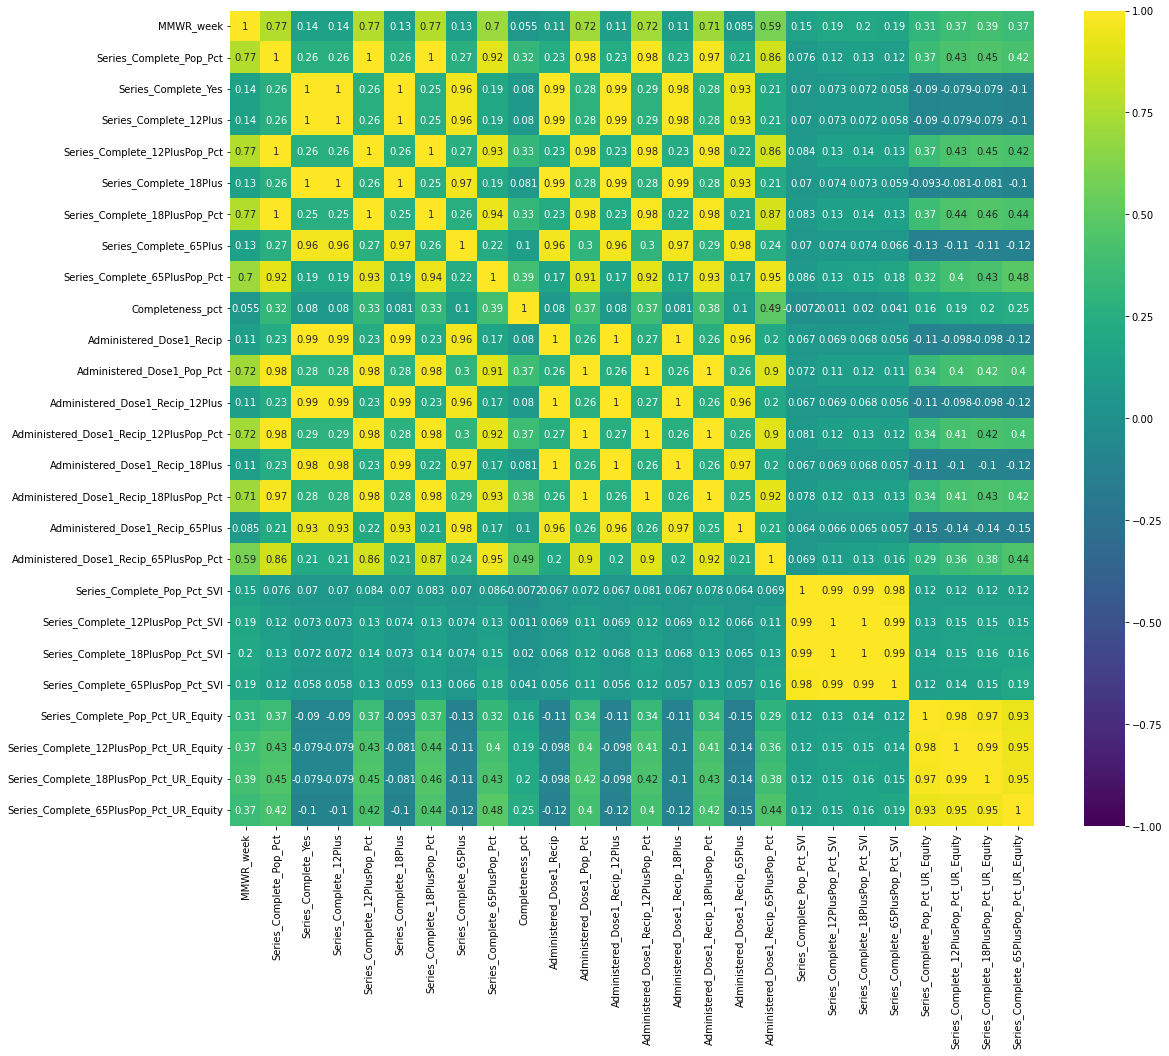

In [14]:
plt.rcParams['figure.figsize'] = (18, 15) #visualizing correlation between all the features
sns.heatmap(data.corr(),annot = True,  cmap = "viridis", vmin = -1, vmax = 1, center = 0)

From the correlation chart, we can see that a few columns are highly correlated, hence dropping one of them will not effect the results. Since the columns 'Series_Complete_Pop_Pct' and 'Series_Complete_Yes' give similar information, we can choose to drop one of them. Same goes for 'Series_Complete_12Plus' and 'Series_Complete_12PlusPop_Pct' and so on.

In [154]:
data = data.drop(['Series_Complete_Yes','Series_Complete_12Plus','Series_Complete_18Plus','Series_Complete_65Plus','Administered_Dose1_Recip','Administered_Dose1_Recip_12Plus','Administered_Dose1_Recip_18Plus','Administered_Dose1_Recip_65Plus'], axis =1)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703494 entries, 0 to 928195
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Date                                     703494 non-null  object 
 1   FIPS                                     703494 non-null  object 
 2   MMWR_week                                703494 non-null  int64  
 3   Recip_County                             703494 non-null  object 
 4   Recip_State                              703494 non-null  object 
 5   Series_Complete_Pop_Pct                  703494 non-null  float64
 6   Series_Complete_12PlusPop_Pct            703494 non-null  float64
 7   Series_Complete_18PlusPop_Pct            703494 non-null  float64
 8   Series_Complete_65PlusPop_Pct            703494 non-null  float64
 9   Completeness_pct                         703494 non-null  float64
 10  Administered_Dose1_Pop_Pct      

In [156]:
data.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI', 'Metro_status',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_Pct_UR_Equity',
       'Series_Complete_65PlusPop_Pct_UR_Equity'],
      dtype='object')

# Visualizations

**Vaccination trends observed on the basis of time duration over the two years**

Text(0, 0.5, 'total vaccine percentage')

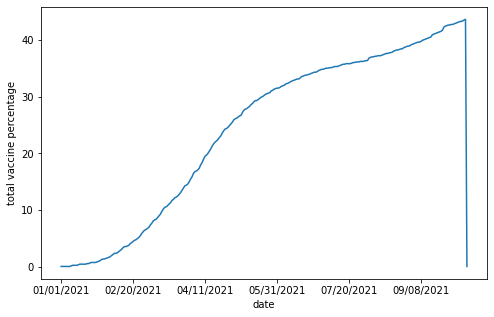

In [18]:
plt.rcParams['figure.figsize'] = (8,5)
data.groupby('Date')['Series_Complete_Pop_Pct'].median().plot()
plt.xlabel('date')
plt.ylabel('total vaccine percentage')

We can observe that as the dates increase, the total percentage of vaccine by each jurisdiction also increases. It can also be seen that the highest percentage of fully administered vaccine is around 40%

Text(0, 0.5, 'Percentage of 1st dose wrt state')

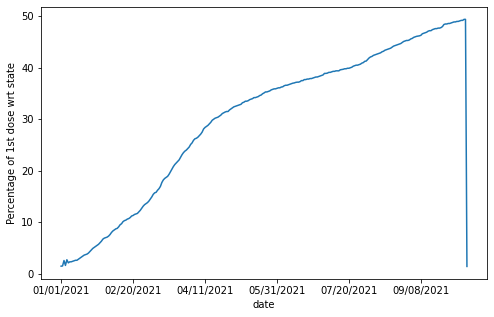

In [19]:
plt.rcParams['figure.figsize'] = (8, 5)
data.groupby('Date')['Administered_Dose1_Pop_Pct'].median().plot()
plt.xlabel('date')
plt.ylabel('Percentage of 1st dose wrt state')

It can be observed that for all the states, percentage of people who have received at least one dose is higher by an average of 10% as compared to percentage of people who are fully vaccinated.

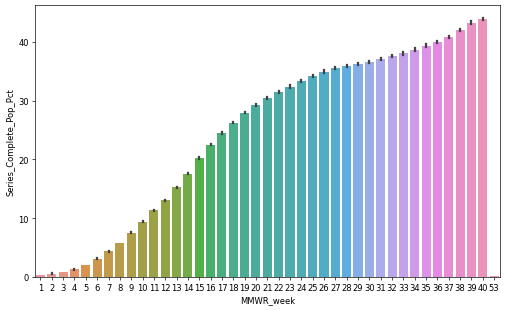

In [ ]:
figure(figsize=(10, 6), dpi=60)
sns.barplot(x='MMWR_week',y='Series_Complete_Pop_Pct', data = data)

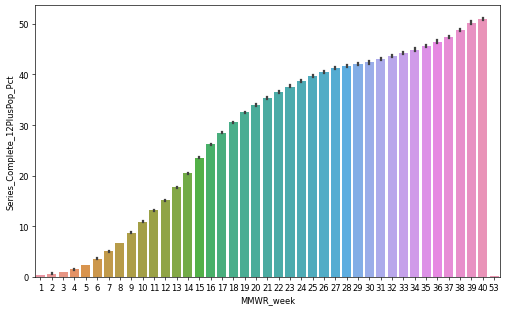

In [ ]:
figure(figsize=(10, 6), dpi=60)
sns.barplot(x='MMWR_week', y='Series_Complete_12PlusPop_Pct', data = data)

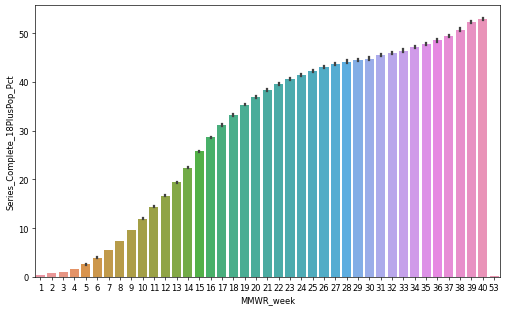

In [ ]:
figure(figsize=(10, 6), dpi=60)
sns.barplot(x='MMWR_week', y='Series_Complete_18PlusPop_Pct', data = data)

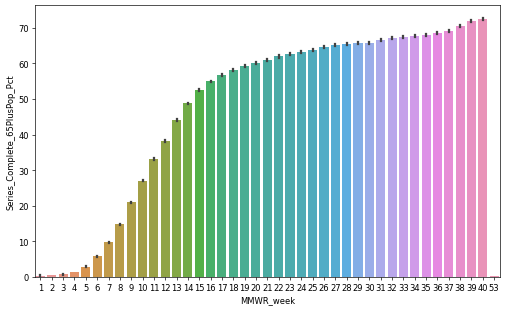

In [ ]:
figure(figsize=(10, 6), dpi=60)
sns.barplot(x='MMWR_week', y='Series_Complete_65PlusPop_Pct', data = data)

MMWR(Morbidity and Mortality Weekly Report) week is a sequential measure used by CDC. From the above plots, we can see that as the date increased, more and more people were vaccinated (09/21 towards the head vs 12/20 at the tail). It can also be seen that the vaccines administered for people with ages 65+ has a more sudden rise in the curve. This indicates that the vaccination process started with administration of vaccines amongst 65+ people, followed by 18+ on later dates and so on.

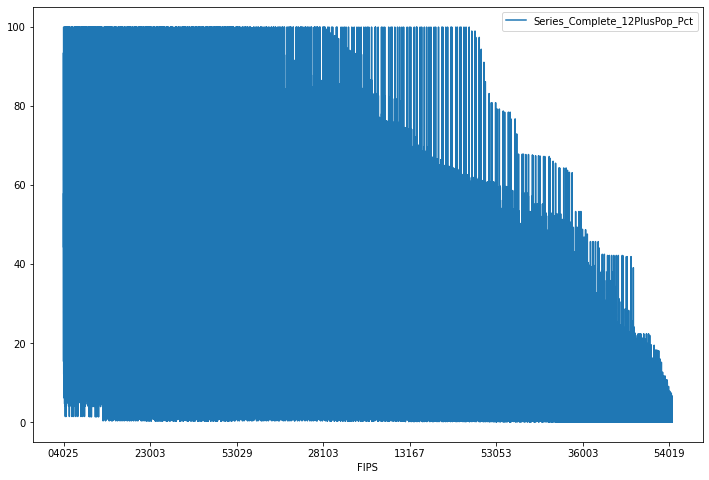

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
data.plot.line(y= 'Series_Complete_12PlusPop_Pct', x = 'FIPS' )

From the graph we can observe that states with a lower FIPS (Federal Information Processing Standard State Code) have a higher percentage of vaccinated people.

<Figure size 576x360 with 0 Axes>

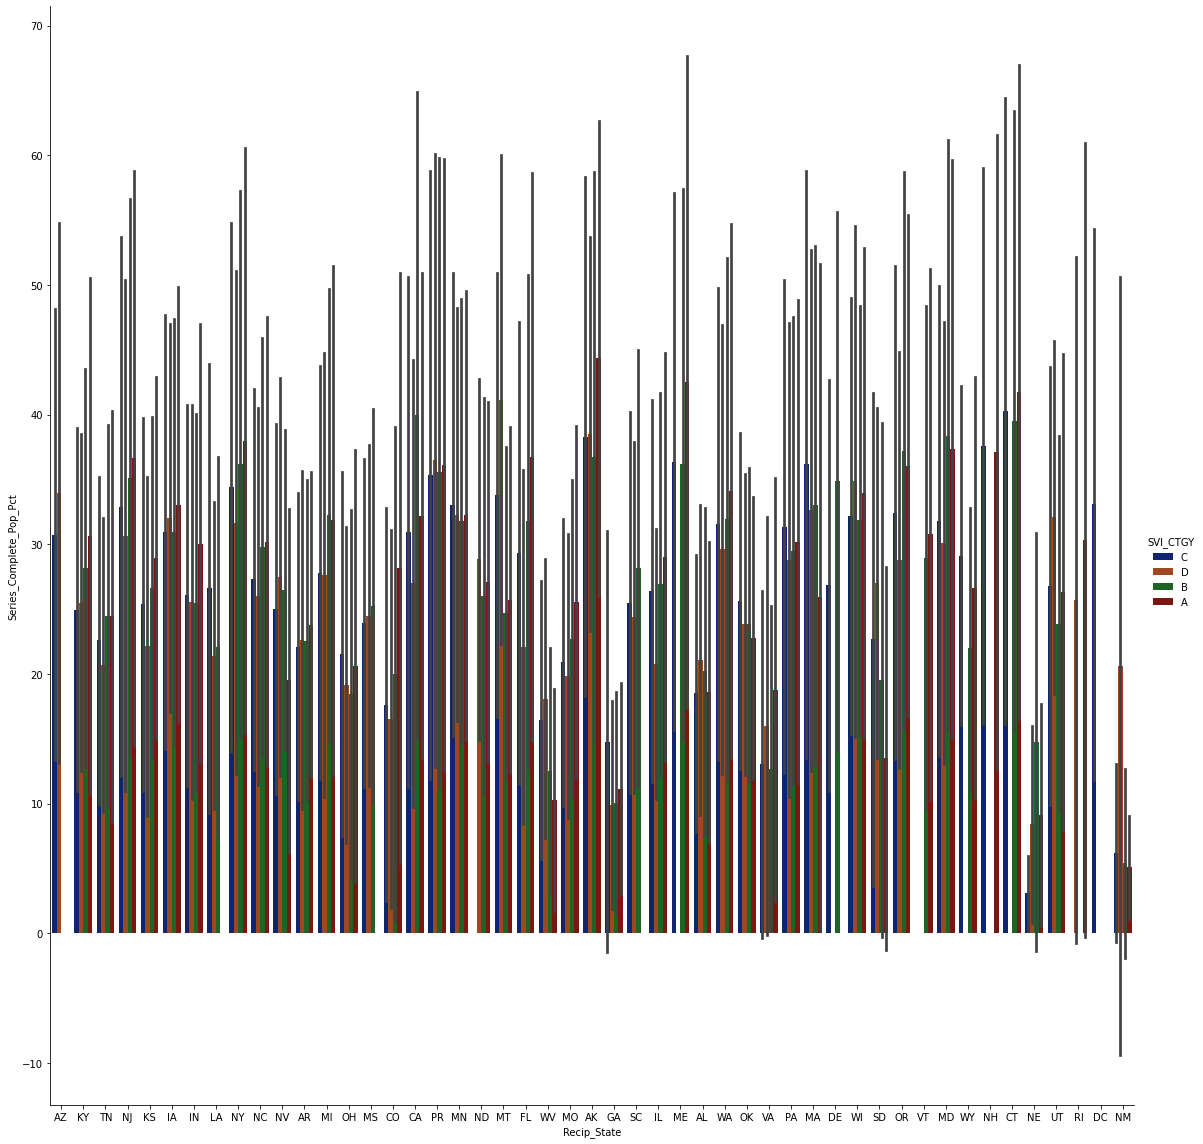

In [20]:
#plt.rcParams['figure.figsize'] = (8,5)
figure(figsize=(8,5))

g = sns.catplot(
    data=data, kind="bar",
    x="Recip_State", y="Series_Complete_Pop_Pct", hue="SVI_CTGY",
    ci="sd", palette="dark", height=16
)

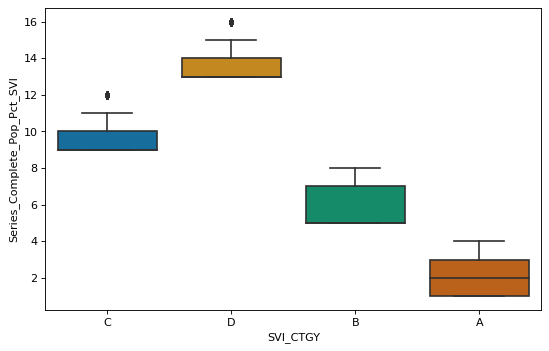

In [ ]:
figure(figsize=(8, 5), dpi=80)
sns.boxplot(y='Series_Complete_Pop_Pct_SVI', x='SVI_CTGY', 
                 data=data, 
                 palette="colorblind"
)

It can be observed that the regions marked with SVI - D have a higher vaccination rate, followed by C, B and A. This implies that population in region A is at the highest risk of suffering from Covid-19

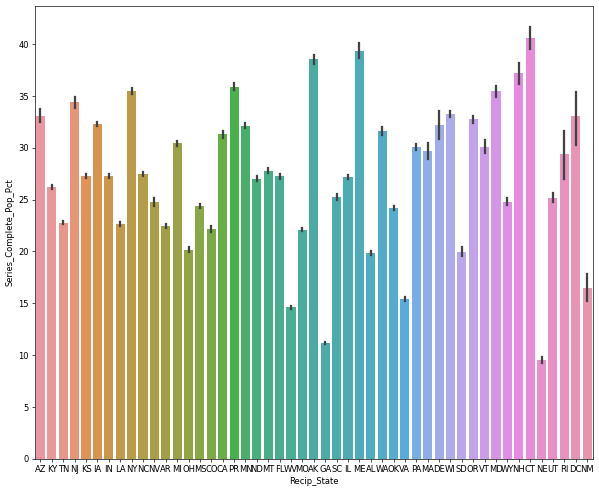

In [ ]:
figure(figsize=(12, 10), dpi=60)
sns.barplot(x='Recip_State', y='Series_Complete_Pop_Pct', data = data)

It can be observed that Connecticut (CT) has the highest number of fully vaccinated people, followed by Maine and Alaska. 
Since the states are in different regions (North, South, East, West) of the country, we can conclude that the procedure is not area specific

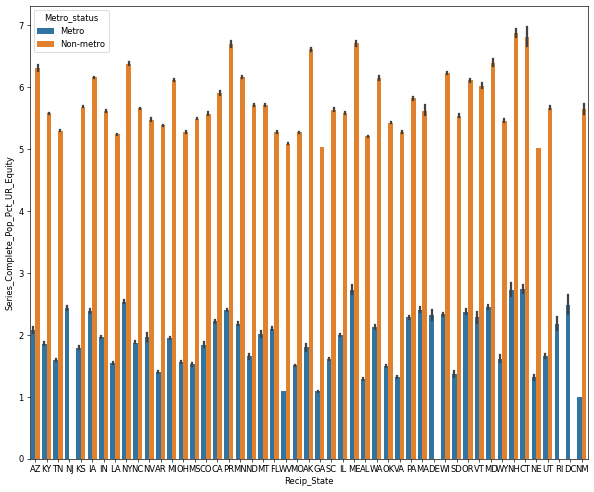

In [ ]:
figure(figsize=(12, 10), dpi=60)
sns.barplot(x="Recip_State", y="Series_Complete_Pop_Pct_UR_Equity", hue="Metro_status", data=data)

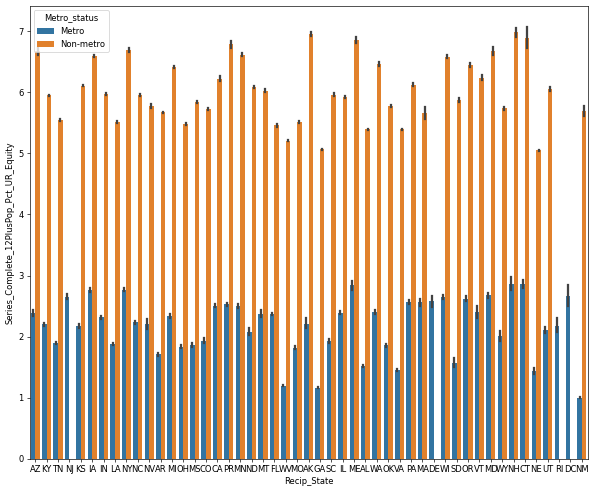

In [ ]:
figure(figsize=(12, 10), dpi=60)
sns.barplot(x="Recip_State", y="Series_Complete_12PlusPop_Pct_UR_Equity", hue="Metro_status", data=data)

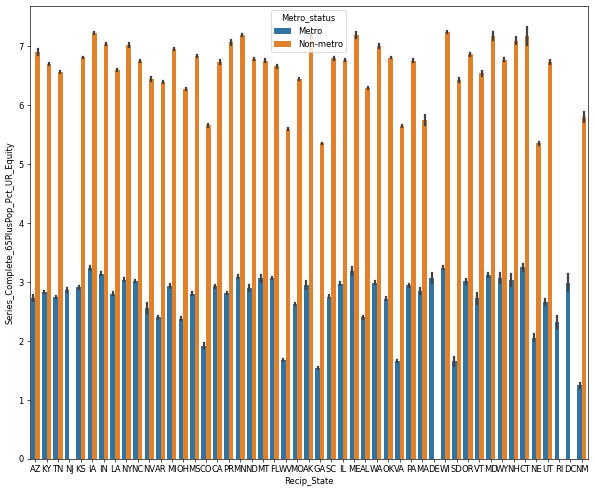

In [ ]:
figure(figsize=(12, 10), dpi=60)
sns.barplot(x="Recip_State", y="Series_Complete_65PlusPop_Pct_UR_Equity", hue="Metro_status", data=data)

It can be observed that for all the states, higher percentage of people (regardless of their age) living in non-metro cities are fully vaccinated.

In [ ]:
df1 = data[data['Series_Complete_Pop_Pct'] == 99.900000]

In [ ]:
df1[['Recip_State','Recip_County']]

,Recip_State,Recip_County
285,GA,Chattahoochee County
1299,PR,Arecibo Municipio
2559,NM,McKinley County
3410,GA,Chattahoochee County
4795,PR,Arecibo Municipio
...,...,...
547324,GA,Chattahoochee County
548676,GA,Chattahoochee County
553013,GA,Chattahoochee County
555499,GA,Chattahoochee County


In [ ]:
df1[['Recip_State']].nunique()

Recip_State    3
dtype: int64

There are only 3 states with almost (99.9%) fully vaccinated people in certain counties - Georiga, Puerto Rico and New Mexico

# Predictive regression modelling

**One hot encoding the nominal variables SVI and Recip_State**

In [157]:
SVI = pd.get_dummies(data.SVI_CTGY)
SVI.head()

,A,B,C,D
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
5,0,0,1,0


In [158]:
data = pd.concat([data, SVI], axis = 1)
data = data.drop(['SVI_CTGY'], axis = 1)

In [159]:
state = pd.get_dummies(data.Recip_State)

In [160]:
data = pd.concat([data, state], axis = 1)
data = data.drop(['Recip_State'], axis = 1)

**Train test and splitting the data**

In [176]:
data['Date']= pd.to_datetime(data['Date'])

In [177]:
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))

In [178]:
train = data.drop(['Series_Complete_Pop_Pct','Recip_County','Metro_status'],axis=1)
test = data['Series_Complete_Pop_Pct']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state=10)

**Linear Regression**

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [181]:
reg = LinearRegression()

In [182]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
pred = reg.predict(X_test)

In [184]:
pred

array([-21.15798566,  15.56732168,  25.85809961, ...,  30.37075136,
        43.22212496, -18.73836317])

In [185]:
reg.score(X_test,y_test)

0.4082506803723166

**Lasso Regression**

In [186]:
from sklearn.linear_model import Lasso

In [187]:
lasso_reg = Lasso(normalize=True)

In [188]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [189]:
pred2 = lasso_reg.predict(X_test)

In [190]:
reg.score(X_test,y_test)

0.4082506803723166

In [191]:
from sklearn import metrics

In [192]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lass_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lass_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lass_pred)))

Mean Absolute Error: 14.528186559268088
Mean Squared Error: 298.39373393099646
Root Mean Squared Error: 17.274076934267615


It can be seen that the regression analysis accuracy scores are below average with the current models. This implies that our target variable (total percentage of people who are fully vaccinated) follows a non traceable trend.

# Conclusion:


*   From the observations, it can be seen that as the dates increase, more and more people are administered with the vaccine. 
*   Vaccination procedure started with a higher age range of 65+ followed by 18+ and 12+.
*   It can be observed that the people staying in SVI region D have a higher vaccination rate, this implies that the facilities provided in the area are of better standard as compared to others and mortality rate due to Covid-19 is lower.
* People living in non-metro cities have a higher vaccination rate.